<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">




# <center> **06. DATA ANALYSIS: STATISTICAL INTRODUCTION** </center>



## **Outline**
1. **Observing variables from population and statistics**
2. **Approximating data from Distributions**
3. **Observing and analyzing data**




In [1]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "H2" #@param {type:"string"}
assignment_id = 'ai1-'+group_id +'.20212.python'
code_subject = '1'
student_id = "2210" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
""" 

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [2]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name', 'course_name', 'student_id'])
config = Config(server_name='https://azuregrader.azurewebsites.net/api', 
                course_name='ai1', student_id='2162107')


def check_solution(assignment_id, student_func_str):

    # Set the endpoint and payload.
    payload = {'func_str': student_func_str, 'assignment_id': assignment_id}
    endpoint_url = config.server_name + '/CheckSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.get(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [3]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "course-AI/ai-uis-student" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/course-AI/ai-uis-student


In [5]:
#@title **Load libs** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__

'1.1.5'

#**1. Observing variables from population and statistics**

In a statistical mindset we respond questions about **populations** rather than about individuals.

**Questions about individuals**
- What is the distance reached by a cannonball fired with a certain angle, force, wind resistance, etc.?
- At what time will this machine fail?

**Questions about populations**
- What is the probability that a texture measure 20 be a bening diagnosis?


### **Breast cancer from data**

For instace, we can obtain a dataset of a set of patients diagnosed with breast cancer and control patients. Each patient is characterized by an histological analysis, by measuring geometrical properties in the nuclei. See an image example of sample, where nuclei is characterized: 


<center> <img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/imagenBreast.jpg" width="240" > </center>

We going to load a related dataset, and then we going to analyze with statistical tools. 


In [6]:
#@title **code**
data_breast = pd.read_csv('data/breast_cancer.csv')
data_breast.diagnosis.replace(to_replace='M', value=1, inplace=True)
data_breast.diagnosis.replace(to_replace='B', value=0, inplace=True)
print(data_breast.shape)
data_breast.head(1)

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


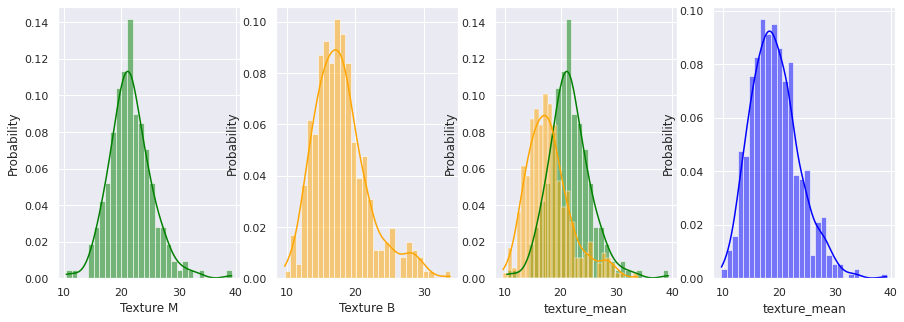

In [7]:
#@title **code:** do these distributions look familiar?
plt.figure(figsize=(15,5))
plt.subplot(1,4, 1);
ax=sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==1], kde=True, color='green', bins=30, stat='probability');
ax.set(xlabel="Texture M")
plt.subplot(1,4, 2);
ax=sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==0], kde=True, color='orange', bins=30, stat='probability');
ax.set(xlabel="Texture B")
plt.subplot(1,4, 3);
sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==1], kde=True, color='green', bins=30, stat='probability');
sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==0], kde=True, color='orange', bins=30, stat='probability');
plt.subplot(1,4, 4);
sns.histplot(data_breast.texture_mean, kde=True, color='blue', bins=30, stat='probability');


Hence, we can ask: 
- If a patient has a texture mean of 17  is it more likely for it to have a Malignant or bening diagnosis?
- From a population analysis and given a texture, Can we discriminate between malignant and bening ?

Sometimes it is not possible to reason about individuals. Maybe we do not have an accurate model about their behavior, **the world is instrinsically noisy**



$\rightarrow$ **observe the power of matrix notation**, try to understand what type of object is generated at each part of the following expressions

- what is the probability of finding Malignant diagnosis with texture larger than 20? 
- what is mean and standard deviation of this population?



In [8]:
#@title **code**
text_m = data_breast.texture_mean[data_breast.diagnosis ==1]
text_b   = data_breast.texture_mean[data_breast.diagnosis ==0]
print("%.3f"%np.mean(text_m), "%.3f"%np.std(text_m))
print("%.3f"%np.mean(text_m>20)) 

21.605 3.771
0.670


we just answered the question above empirically ... 

We can also answer the question using the Gaussian distribution analitically if we consider we have enough evidence to assume that the variable of interest is distributed normally.

#**2. Approximating data from Distributions**

- **SciPy** contains additional routines needed in scientific work: for example, routines for computing integrals numerically, solving differential equations, optimization, and sparse matrices.

The distribution provides a parameterized mathematical function that can be used to calculate the probability from a observable population. A distribution is a general description of a certain characteristic of a population (texture of nucleui in breast cancer).

- Sometimes we are given the exact distribution that a population follows (Malignant texture follow a truncated normal distribution with mean 21.6 and std 3.77)
- Sometimes we are given a sample of a population and that is all we have to answer questions.

### **Some typical known distributions**

Certain processes yield populations with well known distributions.

- A uniform distribution where each value within a certain range is equally likely to occur 
- A normal (gaussian) distribution appears very commonly in nature with continuous values.
- A Poisson distribution  expresses the probability of a given number of events occurring in a fixed interval of time.
- A Bernoulli distribution describes binary experiments (YES/NO, 0/1, heads/tails, ...)


### **CDF.  Cumulative distribution function**


There exist two types of density functions, namely: 

- Probability Density function (PDF): calculates the probability of observing a given value.
- Cumulative Density function  (CDF): calculates the probability of an observation equal or less than a value.

Specifically, the **CDF** is a function that describes the probability that $X$ will take a value less than or equal to $x$ given by: $F_{x}(X) =P(X \leq x)$, defined as $F(x) = \sum_{x_{i} <x} f(x_{i})$. The probability that X lies in the semi-closed interval $\left ( a, b \right ]$, where $a  <  b$, is therefore: $P(a<X\leq b) = F_{x}(b) - F_{x}(a)$

Observe we use the CDF.

analytically: 21.60490566037735
empirically: 21.60490566037735
analytically: 0.665
empirically: 0.670


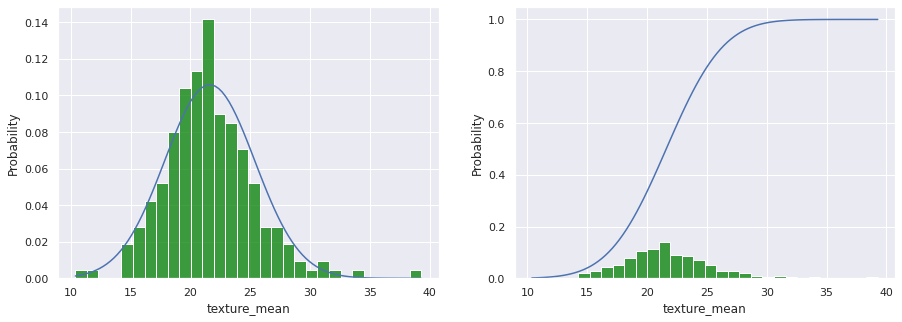

In [9]:
#@title **code**
#CDF= cumulative distribution function
import numpy as np
import scipy.stats as stats


text_m = data_breast.texture_mean[data_breast.diagnosis ==1]
text_b   = data_breast.texture_mean[data_breast.diagnosis ==0]

text_m_dis =  stats.norm(loc=np.mean(text_m), scale=np.std(text_m))
text_b_dis =  stats.norm(loc=np.mean(text_b), scale=np.std(text_b))


plt.figure(figsize=(15,5))
plt.subplot(1,2, 1);
t = np.linspace(np.min(text_m), np.max(text_m), 100)
plt.plot(t, text_m_dis.pdf(t), label="pdf")
sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==1], color='green', bins=30, stat='probability');
plt.subplot(1,2, 2);
sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==1], color='green', bins=30, stat='probability');
plt.plot(t, text_m_dis.cdf(t), label="pdf")
#@markdown we can use the CDF to answer previous question
print("analytically:", text_m_dis.mean())
print('empirically:', text_m.mean(axis=0))
print("analytically:", "%.3f"%(1-text_m_dis.cdf(20)))
print('empirically:', "%.3f"%np.mean(text_m>20)) 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/
-/raw/master/imgs/icon1.png" width="200">

- Load the variable `fractal_dimension_se`
- Visualize distributions for Malignant, bening, and data without diagnosis discrimination
It is a probability function?


In [ ]:
#@title **code student**




Can you etimate probabilities from such normal distribution contruction?
- Which is the next step?

**We need normalize distribution to take measures!**

disc M: 1.03
cont M: 0.98
disc B: 0.71
cont B: 0.98


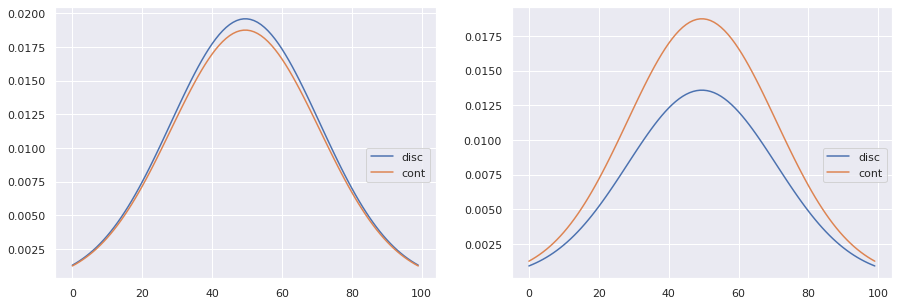

In [11]:
#@title **code:** Two options, from discrete distribution (hist), from continuous distribution

numbers_m_dis = fract_m_dis.rvs(10000)
numbers_b_dis = fract_b_dis.rvs(10000)
plt.figure(figsize=(15,5))
plt.subplot(1,2, 1);
hist_m_dis = np.histogram(numbers_m_dis, bins=50); 
fs_M_disc = 1/np.sum(hist_m_dis[0])
#@markdown #####**Percent point function: returns the value x of the variable that has a given cumulative distribution probability**
lower_bound = fract_m_dis.ppf(0.01); upper_bound = fract_m_dis.ppf(0.99)
x, fs_M_cont = np.linspace(lower_bound, upper_bound, 100, retstep=True)
plt.plot(fs_M_disc*fract_m_dis.pdf(x), label="disc");
plt.plot(fs_M_cont*fract_m_dis.pdf(x), label="cont");
print('disc M: %.2f'% np.sum(fs_M_disc*fract_m_dis.pdf(x)))
print('cont M: %.2f'% np.sum(fs_M_cont*fract_m_dis.pdf(x)))
plt.legend(loc='best', bbox_to_anchor=(1,.5))
plt.subplot(1,2, 2);
hist_b_dis = np.histogram(numbers_b_dis, bins=50); 
fs_B_disc = 1/np.sum(hist_b_dis[0])
l_b = fract_b_dis.ppf(0.01); u_b = fract_b_dis.ppf(0.99)
x, fs_B_cont = np.linspace(l_b, u_b, 100, retstep=True)
plt.plot(fs_B_disc*fract_b_dis.pdf(x), label="disc");
plt.plot(fs_B_cont*fract_b_dis.pdf(x), label="cont");
print('disc B: %.2f'% np.sum(fs_B_disc*fract_b_dis.pdf(x)));
print('cont B: %.2f'% np.sum(fs_B_cont*fract_b_dis.pdf(x)));
plt.legend(loc='best', bbox_to_anchor=(1,.5));

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/
-/raw/master/imgs/icon1.png" width="200">

Now, create a function that return next probabilities from computed distribution, normalized from continious approximation: 

  - The probabilitity of Malignant `fractal_dimension_se` sample = `0.004`
  - The probabilitity of Bening `fractal_dimension_se` sample = `0.003`
  - The probability that Bening samples to have measures less or equal than `0.005`
  - The probability that Malignant samples to have measure larger than `0.003`

In [ ]:
#@title **code student**



#**3. Observing and analyzing data**

We can also use other statitical tools to observe and analyze data


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/Correlation_examples2.png" style="width:1500px;">



**How is related `texture_mean` with `fractal_dimension_se`** ?

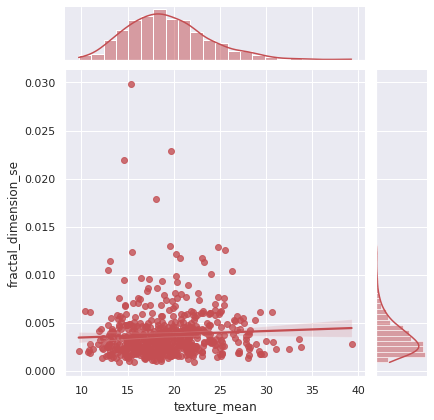

In [13]:
#@title **code**
sns.jointplot(x="texture_mean", y="fractal_dimension_se", data=data_breast, color="r", kind='reg'); 

In terms of correlation, what we can say about these variables with respect to the diagnosis?

- We can observe in terms with correlations!

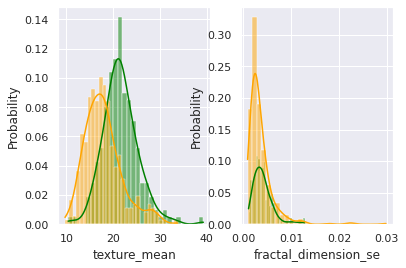

In [14]:
#@title **code**
plt.subplot(1,2, 1);
sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==1], kde=True, color='green', bins=30, stat='probability');
sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==0], kde=True, color='orange', bins=30, stat='probability');
plt.subplot(1,2, 2);
sns.histplot(data_breast.fractal_dimension_se[data_breast.diagnosis ==1], kde=True, color='green', bins=30, stat='probability');
sns.histplot(data_breast.fractal_dimension_se[data_breast.diagnosis ==0], kde=True, color='orange', bins=30, stat='probability');


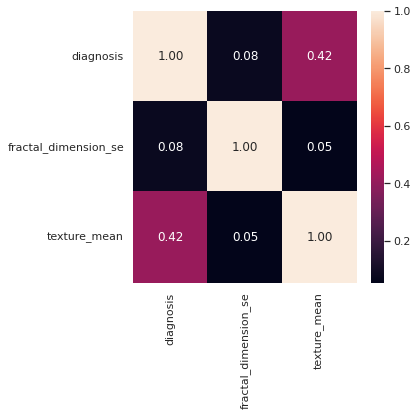

In [15]:
#@title **code** we can compute the correlation  
#@markdown  we can compute analytically correlations
plt.subplots(figsize=(5,5)) #Importante para que se vean todas las correlaciones
corr = data_breast[['diagnosis', 'fractal_dimension_se', 'texture_mean']].corr()
sns.heatmap(corr, annot=True, fmt=".2f")

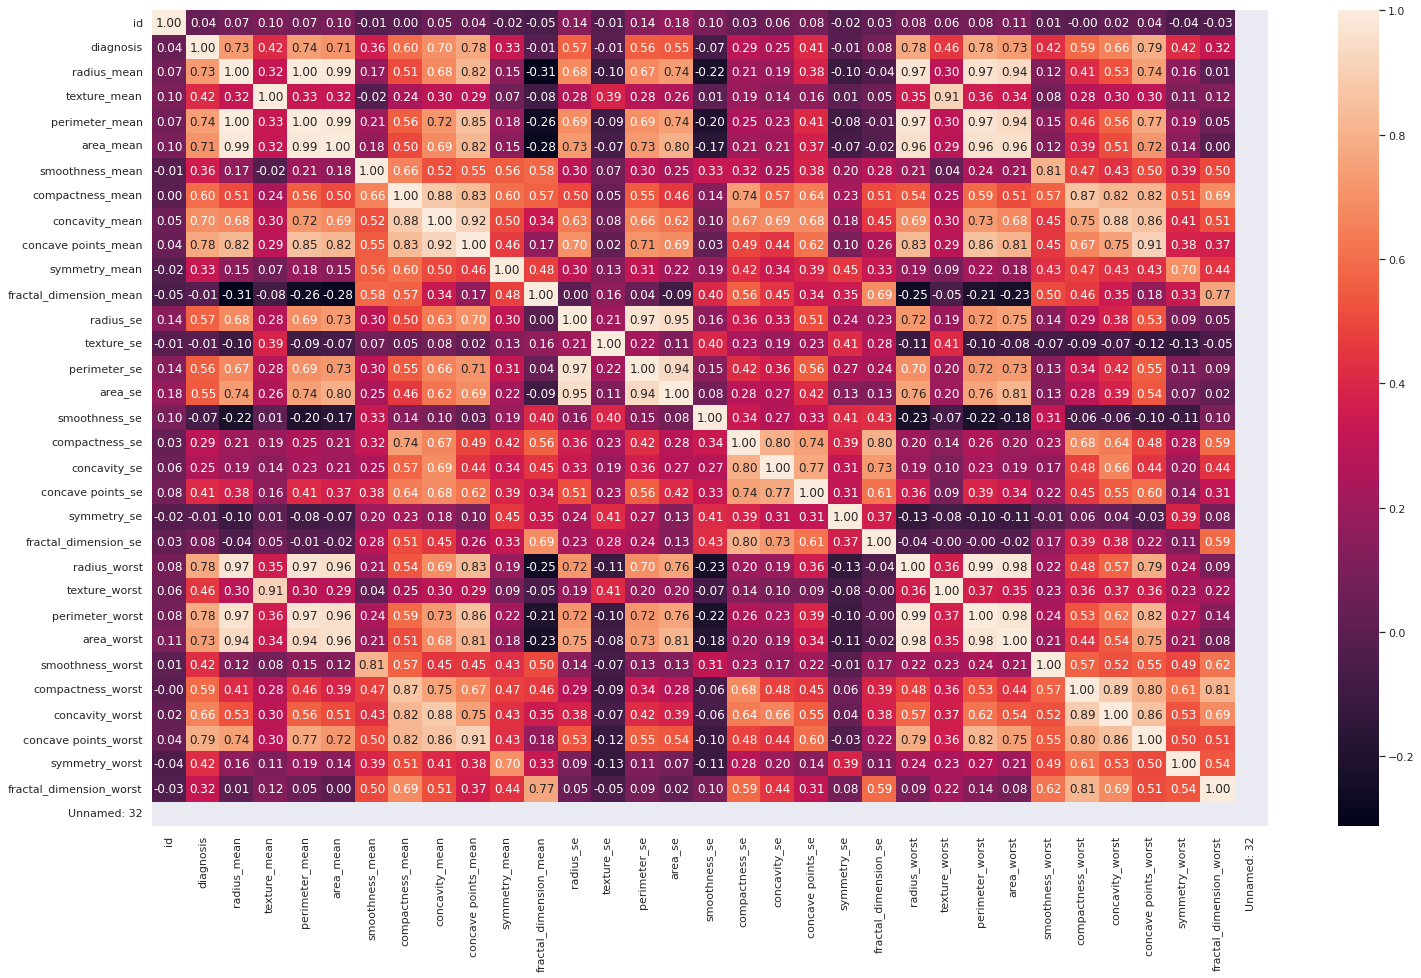

In [16]:
#@title **code** Observe correlation for variables of interest
plt.subplots(figsize=(25,15)) #Importante para que se vean todas las correlaciones
corr = data_breast.corr()
sns.heatmap(corr, annot=True, fmt=".2f")

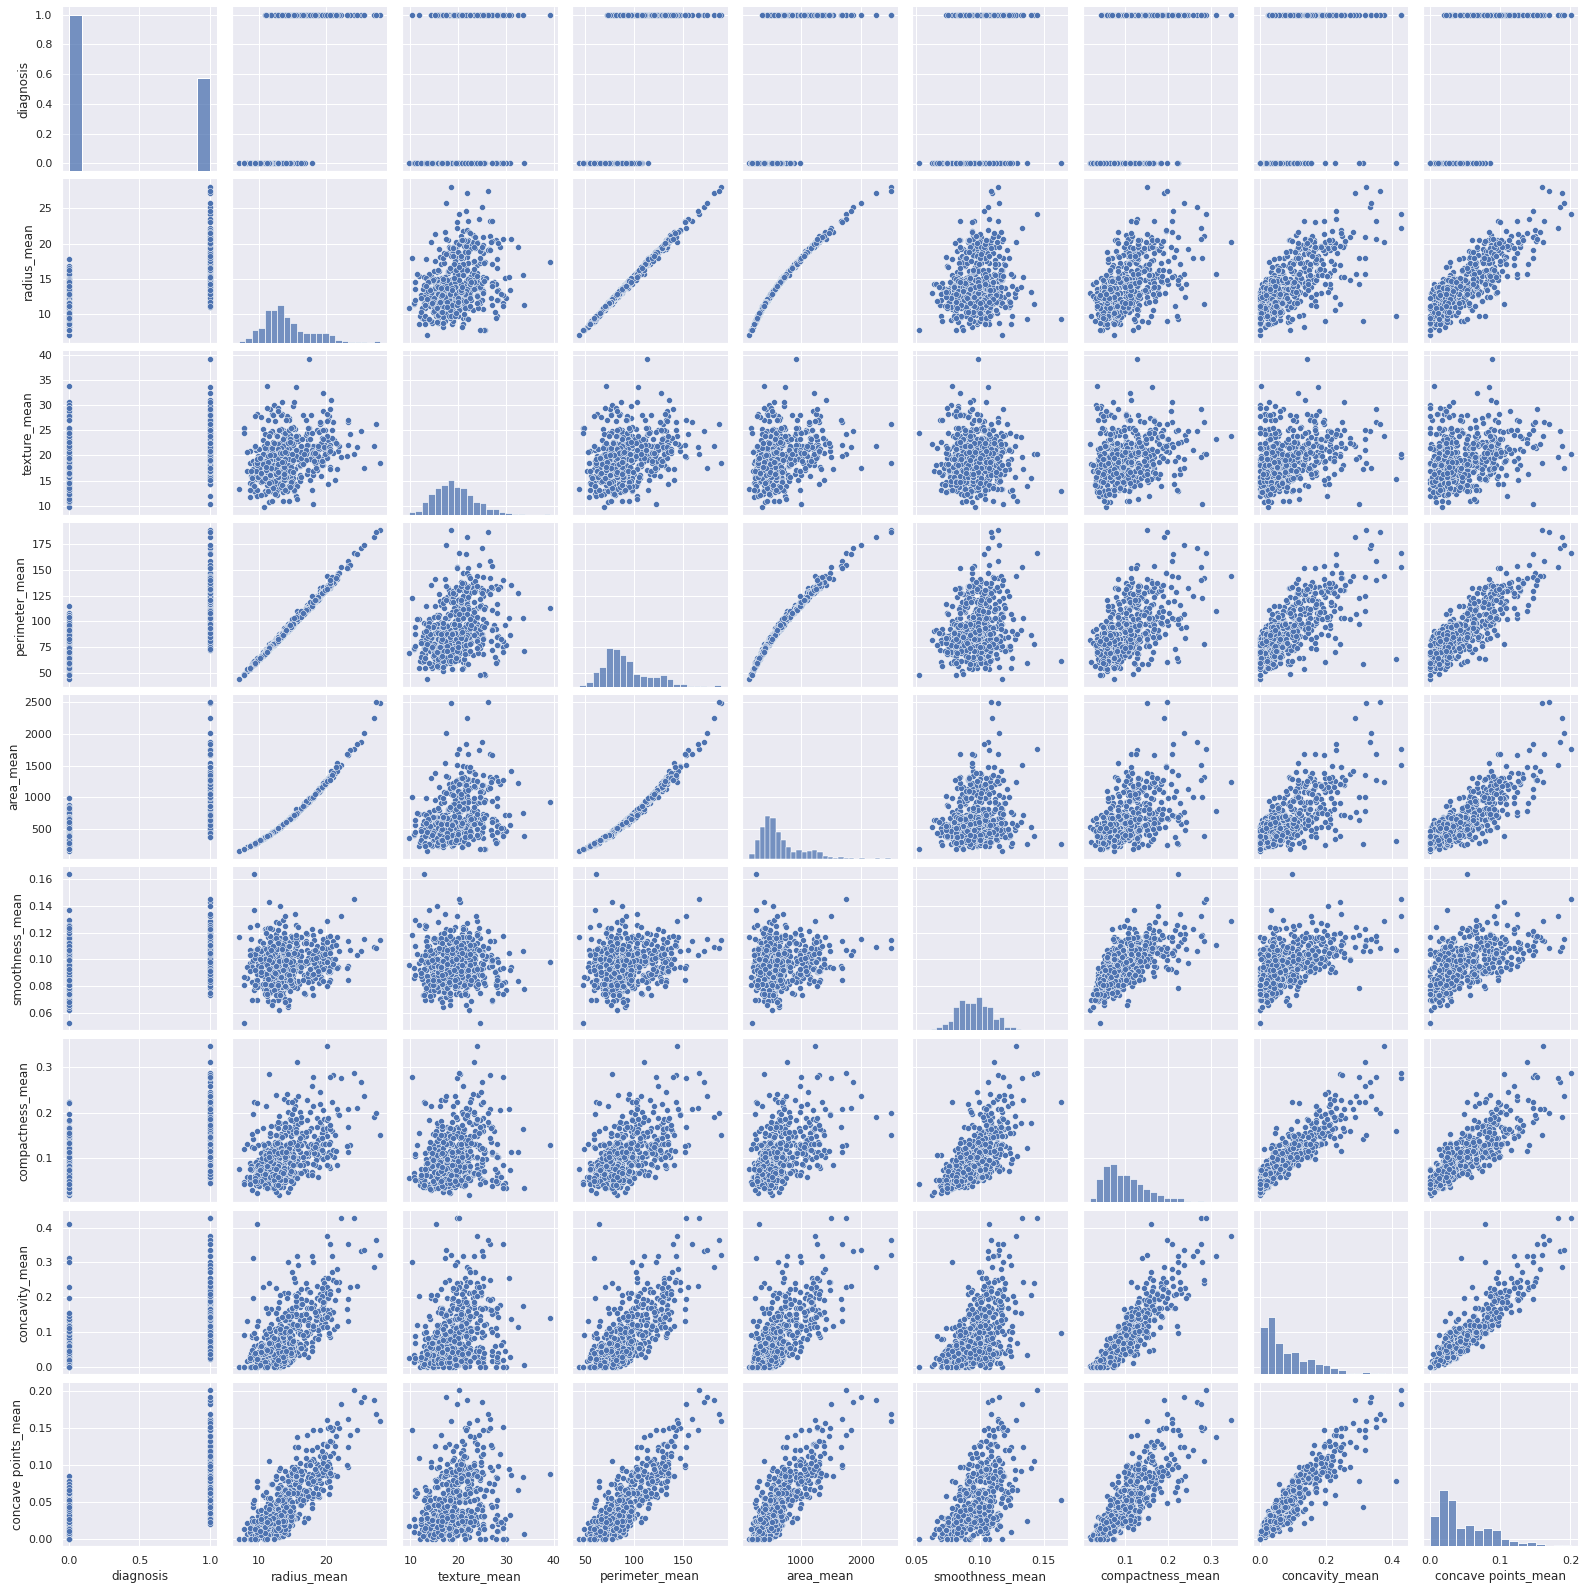

In [17]:
#@title **code** of course dont forget to compute the pairplot to observe the problem!

subset_variables = list(data_breast.columns)[1:10]
sns.pairplot(data=data_breast[subset_variables])

## **References**

[1] statistic in plain english (book)

[2] Reference scipy: https://docs.scipy.org/doc/scipy/reference/index.html

[3] Some distributions in scipy: http://cmdlinetips.com/2018/03/probability-distributions-in-python/

[4] Statistical distributions: a summary: http://people.stern.nyu.edu/adamodar/New_Home_Page/StatFile/statdistns.htm

[5] Probability concepts explained: Introduction: https://towardsdatascience.com/probability-concepts-explained-introduction-a7c0316de465


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
